> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [20]:
#importing the important packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [21]:
#loading the dataset
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
#dropping unuseful features
df.drop(['PatientId','AppointmentID','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Drop unimportant columns

In [23]:
#converting date column to datetime type to make process on it
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   Gender         110527 non-null  object             
 1   ScheduledDay   110527 non-null  datetime64[ns, UTC]
 2   Age            110527 non-null  int64              
 3   Neighbourhood  110527 non-null  object             
 4   Scholarship    110527 non-null  int64              
 5   Hipertension   110527 non-null  int64              
 6   Diabetes       110527 non-null  int64              
 7   Alcoholism     110527 non-null  int64              
 8   Handcap        110527 non-null  int64              
 9   SMS_received   110527 non-null  int64              
 10  No-show        110527 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(3)
memory usage: 9.3+ MB


in this step i converted the type of 'ScheduledDay' column to datetime to be able to make processes on it

In [24]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

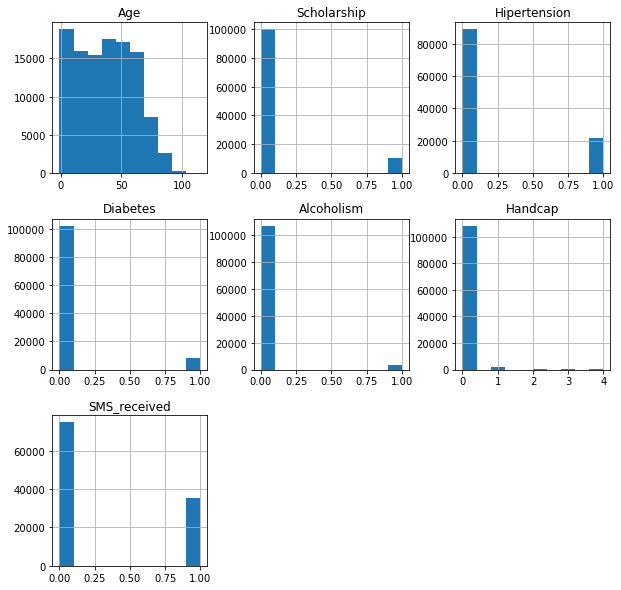

In [25]:
#overview of the dataset features
df.hist(figsize=(10,10));

A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.


In [26]:
#create two boolean variable of No-show variable to make the analysis easier
show_up = df['No-show']=='No'
no_show_up = df['No-show']=='Yes'

create two boolean variable of No-show variable to make the analysis easier

In [27]:
df[show_up].count()

Gender           88208
ScheduledDay     88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hipertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
No-show          88208
dtype: int64

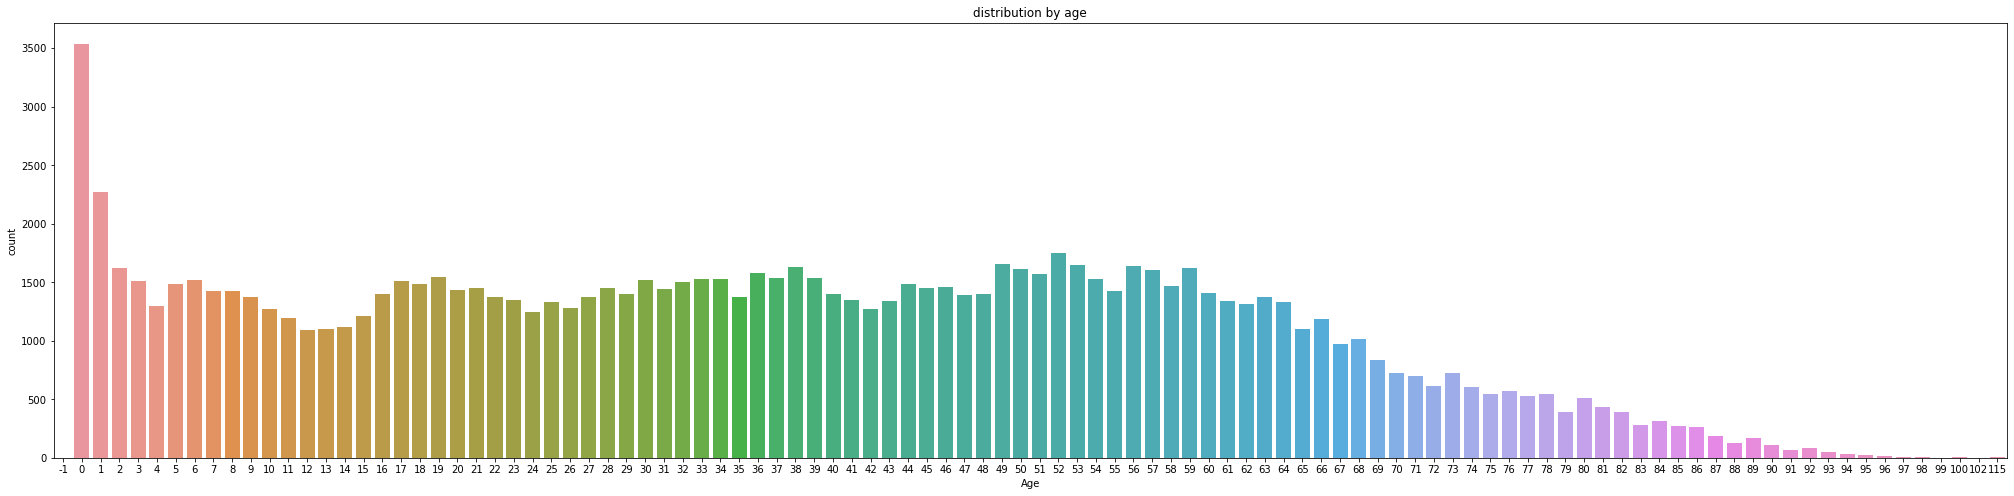

In [28]:
# Let's see how many there are patients of each age
plt.figure(figsize=(35,8))
ax = sns.countplot(x=df.Age)
ax.set_title("distribution by age")
plt.show()

in the cell above we see right skewed after age 70

In [29]:
f_show,m_show=df.Gender[show_up].value_counts()
f_noshow,m_noshow=df.Gender[no_show_up].value_counts()

print('Percentage of women attending',f_show/(f_show+f_noshow))
print('Percentage of men attending',m_show/(m_show+m_noshow))
print('Percentage of women not attending',f_noshow/(f_show+f_noshow))
print('Percentage of men not attending',m_noshow/(m_show+m_noshow))

Percentage of women attending 0.7968541202672605
Percentage of men attending 0.8003205211052808
Percentage of women not attending 0.20314587973273943
Percentage of men not attending 0.19967947889471915


Calculate the attendance and non-attendance ratio for the total number because the number of women is not equal to the number of men

In [30]:
def plot_hist(var,title,xlabel,ylabel):
    plt.figure(figsize=(12,12))
    var[show_up].hist(color='blue',alpha=.5,label='show')
    var[no_show_up].hist(color='red',alpha=.5,label='no_show')
    plt.legend();
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### does the gender affect the attendance?

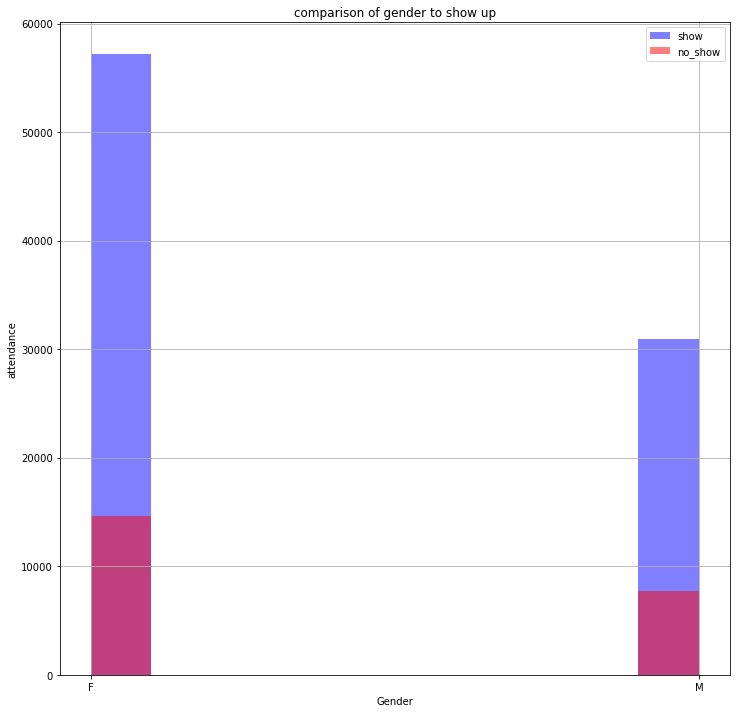

In [31]:
plot_hist(df.Gender,'comparison of gender to show up','Gender','attendance')

We note that the number of women is absolutely greater than the number of men,
but for attendance the ratio is almost the same

### does the Age affect the attendance?

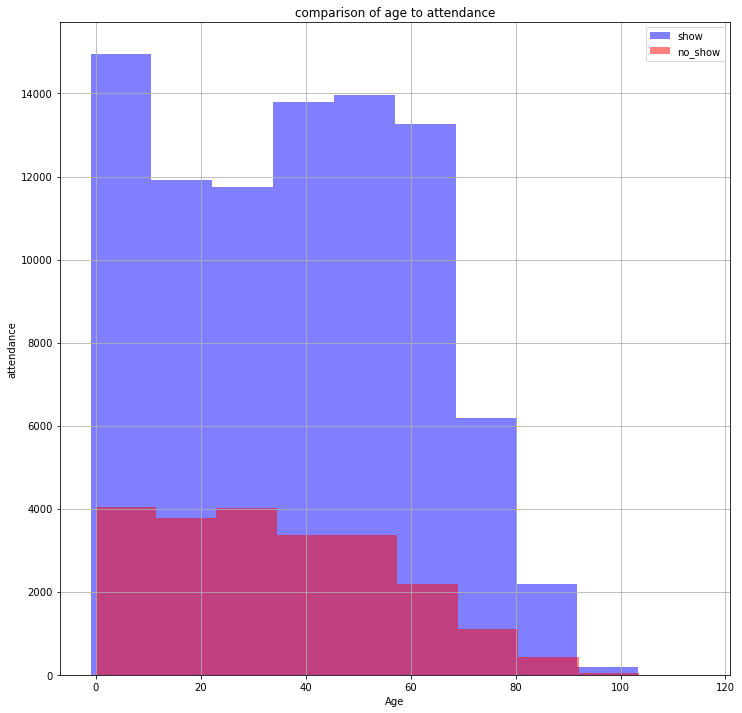

In [32]:
plot_hist(df.Age,'comparison of age to attendance','Age','attendance')

Of course, ages 0-10 showed the most followed by the 35-70 range.

In [33]:
#to see the most popular months in the dataset
df['month'] = df.ScheduledDay.dt.month
df.month.value_counts()

5     67421
4     25339
6     13750
3      3614
2       281
12       61
1        60
11        1
Name: month, dtype: int64

### does the month affect the attendance?

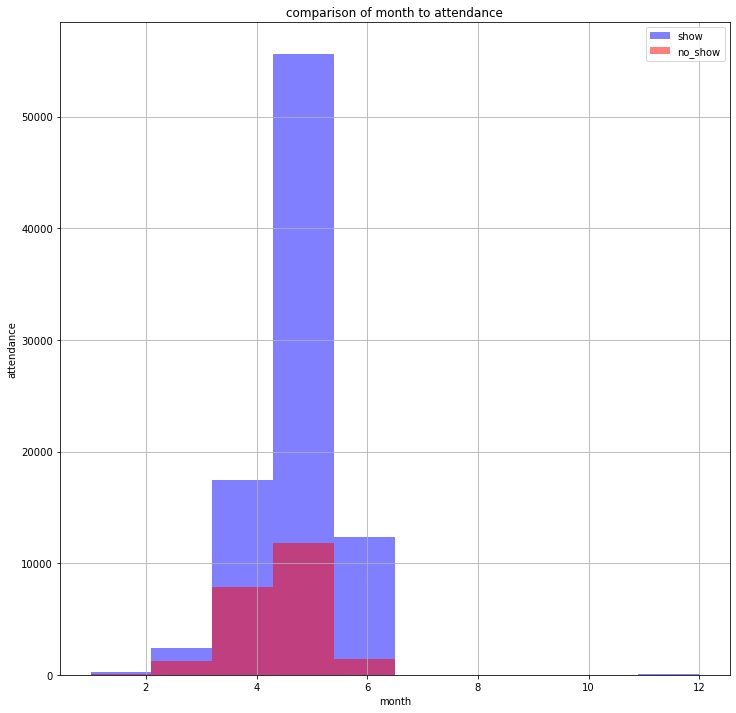

In [34]:
plot_hist(df.month,'comparison of month to attendance','month','attendance')

We observe that May is the month with the most attendance, followed by April

### does the Scholarship affect the attendance?

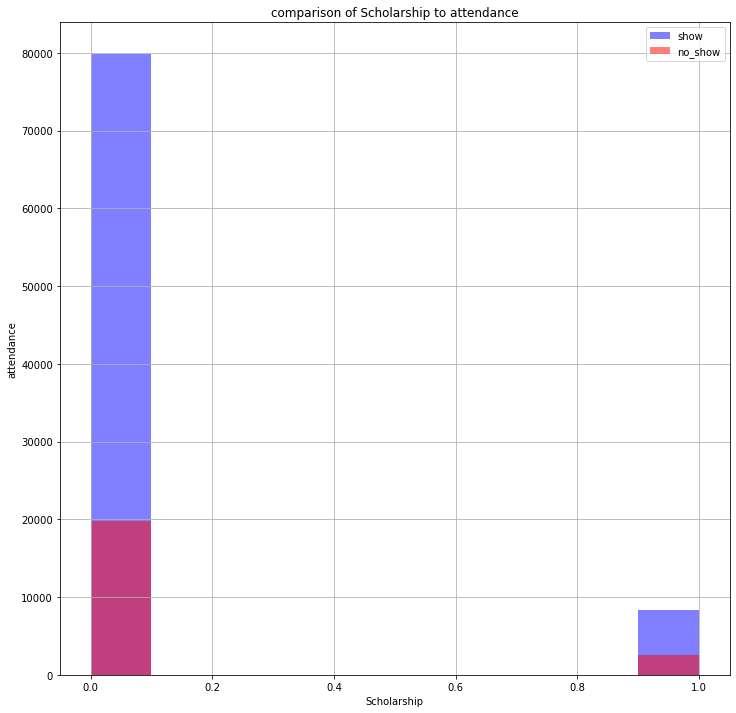

In [35]:
plot_hist(df.Scholarship,'comparison of Scholarship to attendance','Scholarship','attendance')

### Conclusions
- Age plays a big role in this data, the age after 70 years has a lower chance of attendance and between 50 and 60 are the most attended.

- In terms of gender, the number of women is the largest but almost the same proportion of attendance.

- we observe also that the most popular month in attendance is may.

- It seems that the scholarship does not have a significant impact on the attendance rate of patients.

### Limitations

- Lack of features, I think if there were more features like "whether the patient has transportation or not" it would have given a better analysis.


In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0